In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

C:\Users\gabri\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Getting the data

In [3]:
region_map = gpd.read_file('../../../data/RIO DE JANEIRO MAPS/final_map/final_map2.geojson')

## Match Day

In [5]:
matchday = gpd.read_file('../../../data/trips_reports/adjusted data/matchday(20-4).geojson')

## Other days of the week

In [7]:
sunday = pd.read_csv('../../../data/trips_reports/raw data/my_report(17-4).csv')
monday = pd.read_csv('../../../data/trips_reports/raw data/my_report(18-4).csv')
tuesday = pd.read_csv('../../../data/trips_reports/raw data/my_report(19-4).csv')
thursday = pd.read_csv('../../../data/trips_reports/raw data/my_report(21-4).csv')
friday = pd.read_csv('../../../data/trips_reports/raw data/my_report(22-4).csv')
saturday = pd.read_csv('../../../data/trips_reports/raw data/my_report(23-4).csv')

In [8]:
def adjust1(csv):
    csv = csv.sort_values(by='origin_id')
    csv.reset_index(inplace=True)
    csv = csv.drop(columns=['index'], axis=1)

In [10]:
adjust1(sunday)
adjust1(monday)
adjust1(tuesday)
adjust1(thursday)
adjust1(friday)
adjust1(saturday)

In [13]:
#Function to normalize the "total_trips" column
#total_trips is str and has some '<10' values
def normalize(df):
    for key, value in df["total_trips"].iteritems():
        if value == '<10':
            df.at[key, 'total_trips'] = '5'
    
    df['total_trips'] = df['total_trips'].astype(float)

In [14]:
normalize(sunday)
normalize(monday)
normalize(tuesday)
normalize(thursday)
normalize(friday)
normalize(saturday)

C:\Users\gabri\AppData\Local\Temp\ipykernel_5244\1966558018.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in df["total_trips"].iteritems():


In [15]:
def adjust2(csv, df):
    day_region = pd.merge(df, csv, how='left', left_on=['ID'], right_on=['origin_id'])
    day_region = day_region[:183]
    day_region.at[182, 'total_trips'] = 0
    day_region.fillna(0, inplace=True)
    return(day_region)

In [18]:
sunday_region = adjust2(sunday, region_map)
monday_region = adjust2(monday, region_map)
tuesday_region = adjust2(tuesday, region_map)
thursday_region = adjust2(thursday, region_map)
friday_region = adjust2(friday, region_map)
saturday_region = adjust2(saturday, region_map)

# Plotting

<Figure size 1440x1296 with 0 Axes>

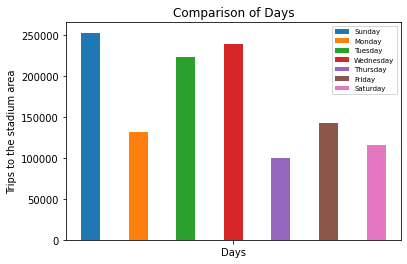

<Figure size 1440x1296 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

# Data to be plotted
value1 = int(matchday['total_trips'].sum())
value2 = int(sunday_region['total_trips'].sum())
value3 = int(monday_region['total_trips'].sum())
value4 = int(tuesday_region['total_trips'].sum())
value5 = int(thursday_region['total_trips'].sum())
value6 = int(friday_region['total_trips'].sum())
value7 = int(saturday_region['total_trips'].sum())

# Creating the bar chart
bar_width = 0.4
bar1 = plt.bar(1 + bar_width, value1, bar_width)
bar2 = plt.bar(2 + bar_width, value2, bar_width)
bar3 = plt.bar(3 + bar_width, value3, bar_width)
bar4 = plt.bar(4 + bar_width, value4, bar_width)
bar5 = plt.bar(5 + bar_width, value5, bar_width)
bar6 = plt.bar(6 + bar_width, value6, bar_width)
bar7 = plt.bar(7 + bar_width, value7, bar_width)

# Adding labels and title
plt.ylabel('Trips to the stadium area')
plt.title('Comparison of Days')
plt.xticks([4.2+ bar_width/2], ['Days'])

# Adding legend
plt.legend((bar1[0], bar2[0], bar3[0], bar4[0], bar5[0], bar6[0], bar7[0]), 
           ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), fontsize='x-small')

# Show the chart
plt.figure(figsize=(20,18))